This is an jupyter notebook from iKISS package 🐍.

By Julie Orjuela (UMR DIADE - IRD)

iKISS 💋 is a software under GNU v3 Licence

# 1. Manhattan plot of the distribution of kmers (LFMM outliers) mapped on a genome reference 

In [2]:
import pandas as pd
import numpy as np
from qmplot import manhattanplot

In [8]:
df= pd.read_csv("11.OUTLIERS_LFMM_POSITION/outliers_with_position.csv", sep='\t')

In [ ]:
df

sequence        bedname  segment_nb  \
0       AAAAAAAAAAAAAAAAAAAAAAGACTAGGCT  output_file.0          10   
1       AAAAAAAAAAAAAAAAAGCAGTACCAGAAGA  output_file.0          10   
2       AAAAAAAAAAAAAAAACTAGTAATCCACCTC  output_file.0          10   
3       AAAAAAAAAAAAAAACCATGGGACATGGATT  output_file.0          10   
4       AAAAAAAAAAAAAAAGACTAGGCTTGGATTT  output_file.0          10   
...                                 ...            ...         ...   
836444  AAAAGCAGAGAATAATAGGTAATTTACACAA  output_file.9           9   
836445  AAAAGCAGGCAGCTCTTTACTCGTTTCTTTG  output_file.9           9   
836446  AAAAGCAGGTACGAAGGATCTAAGTCCAACA  output_file.9           9   
836447  AAAAGCATAATTCAGTAGCACTGTCGATAGC  output_file.9           9   
836448  AAAAGCATCGAGAAAGGCCCATTTTCCTGTA  output_file.9           9   

              pvalue  kmer_number             REF  position  
0       2.842436e-07        22834     NC_052403.1  12496329  
1       9.925288e-05       114441  NW_024068428.1    100424  
2       1.340398e-11       138122  NW_024068444.1    113925  
3       4.368884e-05       175590  NW_024067773.1    276691  
4       2.287188e-26       189201     NC_052403.1  12496336  
...              ...          ...             ...       ...  
836444  1.410008e-04       959291  NW_024068119.1     35814  
836445  0.000000e+00       971015  NW_024068444.1     58016  
836446  7.547603e-05       972781  NW_024067794.1    325984  
836447  2.113210e-15       983524  NW_024067923.1    342200  
836448  6.656175e-36       996904  NW_024068475.1    115454  

[836449 rows x 7 columns]

## Plotting outliers pvalues in chromosomes

Here you can find a fonction manhattan allow you create a manhattan plot using outliers kmers with position generated by iKISS. 

Please modify this line in fonction in fonction of chromosomes in the reference you have used.

` liste.append("GEN") if "NC" or "NW" or "CM" in row else liste.append("PAN")` 


In [10]:
import seaborn as sns
import pandas as pd
import numpy as np

def manhattan(df, title, plot):  
    # on fait une colonne classe
    liste=[]
    xtick=[]
    for row in df['REF']:
        # modify this line in fonction of chromosomes in the reference you have used
        liste.append("GEN") if "NC" or "NW" or "CM" in row else liste.append("PAN")
    df['classe'] = liste
    ### sort par col ref puis par position
    df = df.sort_values(by = ['REF', 'position'], ascending = [True, True], na_position = 'first')
    df['-logp']= - np.log10(df['pvalue'])
    run_pos = 0
    cum_pos = []
    # calcule cumulative positions to give a x axe size in manhattan
    for chrom, group_df in df.groupby('REF'):
        cum_pos.append(group_df['position'] + run_pos)
        run_pos += group_df['position'].max()
    # new columns
    df['cum_pos'] = pd.concat(cum_pos)
    df['kmernb'] = df.index
   
    if plot:
    # fait le manhattan
        g = sns.relplot(data=df, x='cum_pos', y='-logp', aspect=4, hue="REF", palette='Set1', linewidth=0, s=8, legend= None )
        g.ax.set_xlabel('Chromosome')
        g.ax.set_xticks(df.groupby('REF')['cum_pos'].median())
        g.ax.set_xticklabels(df['REF'].unique())
        g.ax.axhline(20, linestyle="--", linewidth=1)
        g.fig.suptitle(title)        

/home/orjuela/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


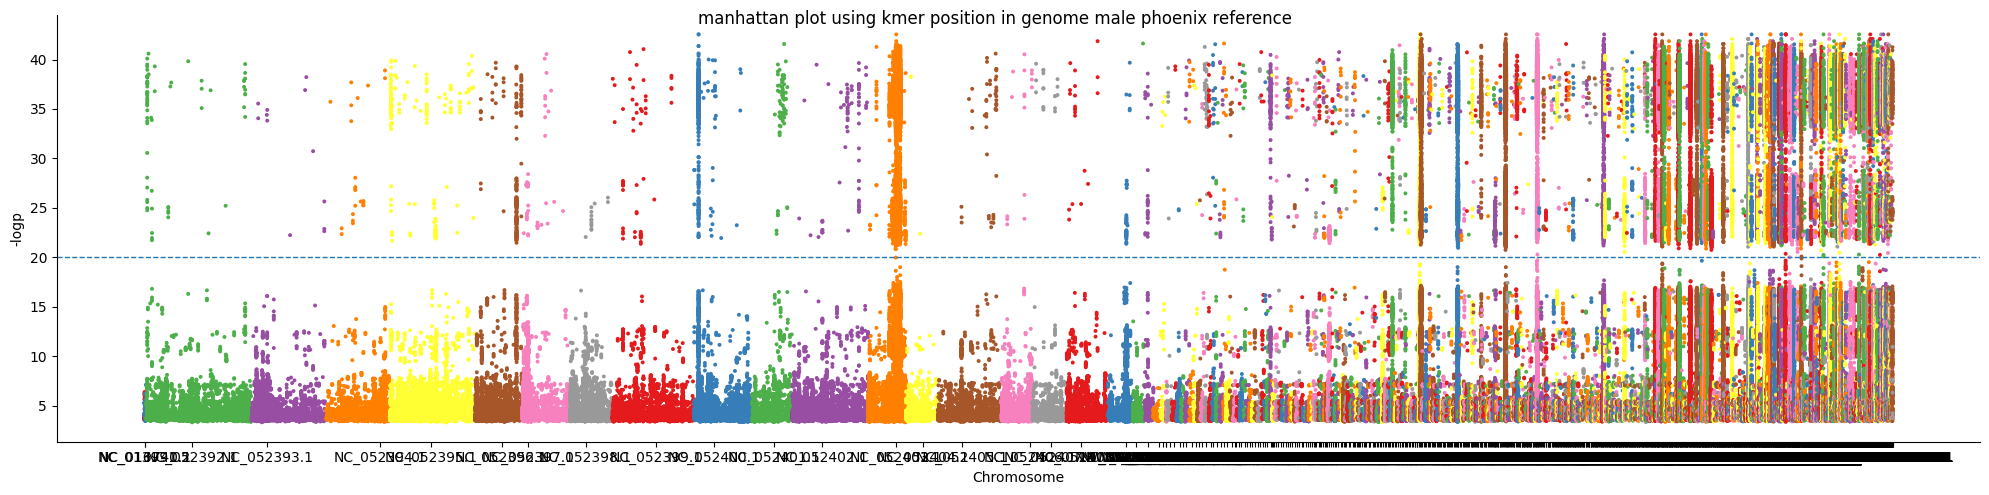

In [11]:
title='manhattan plot using kmer position in genome male phoenix reference'
manhattan(df,title,True)

### plotting only chromosomes 1 to 18

/tmp/ipykernel_187975/1270294576.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classe'] = liste
/home/orjuela/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


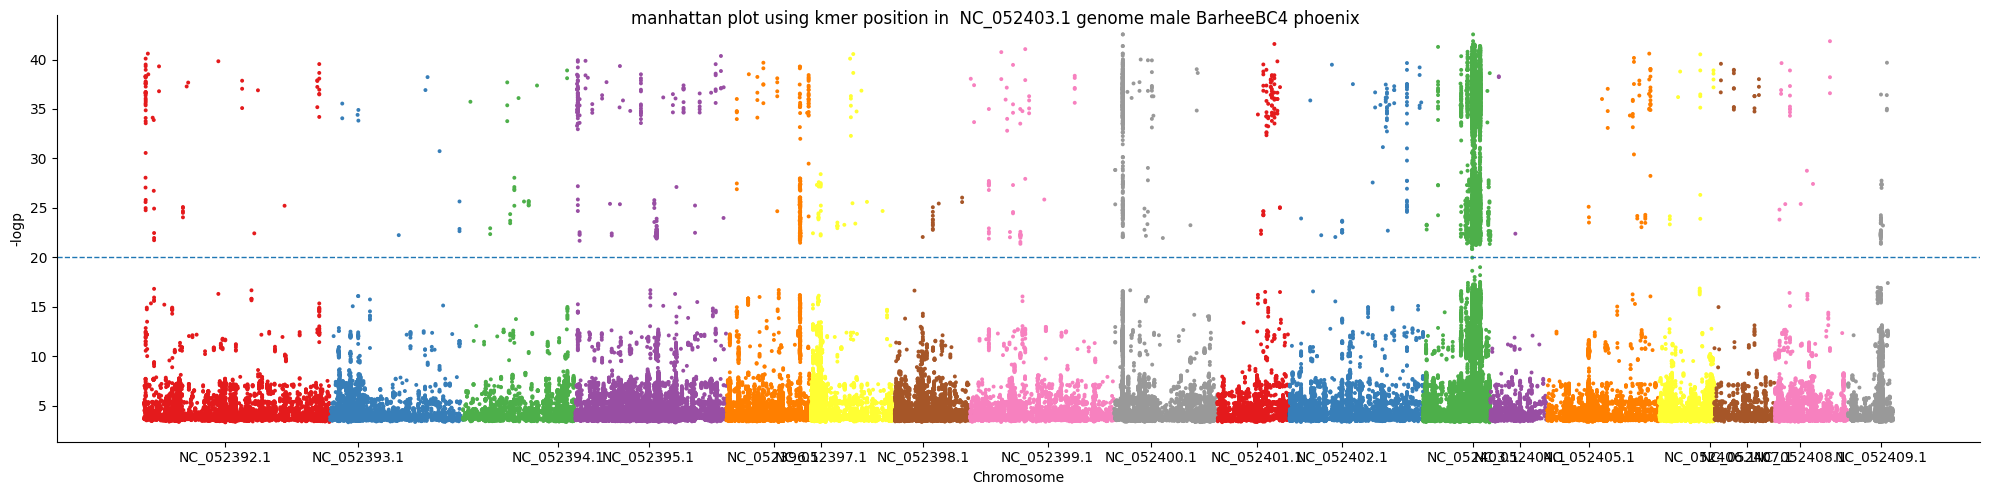

In [14]:
options = ["NC_052392.1", "NC_052393.1", "NC_052394.1", "NC_052395.1", "NC_052396.1", "NC_052397.1", "NC_052398.1", "NC_052399.1", "NC_052400.1", "NC_052401.1", "NC_052402.1", "NC_052403.1", "NC_052404.1", 
"NC_052405.1", "NC_052406.1", "NC_052407.1", "NC_052408.1", "NC_052409.1"]
# selecting rows based on condition
dff=df[df['REF'].isin(options)]
title='manhattan plot using kmer position in  NC_052403.1 genome male BarheeBC4 phoenix'
# nrows=10000
manhattan(dff,title,True)

### plotting only chr11 to chr15

/tmp/ipykernel_187975/1270294576.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classe'] = liste
/home/orjuela/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


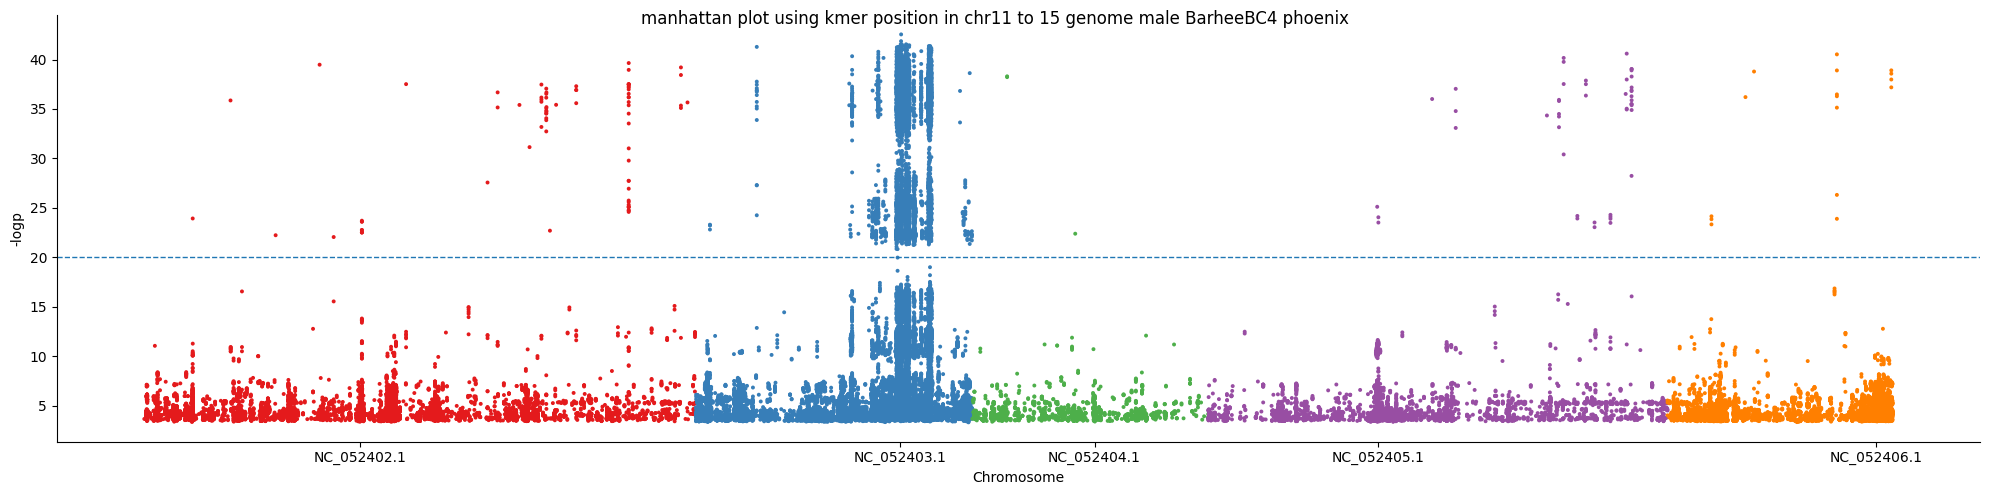

In [22]:
options = ["NC_052402.1", "NC_052403.1", "NC_052404.1", "NC_052405.1", "NC_052406.1"]
# selecting rows based on condition
dff=df[df['REF'].isin(options)]
title='manhattan plot using kmer position in chr11 to 15 genome male BarheeBC4 phoenix'
# nrows=10000
manhattan(dff,title,True)